In [39]:
import pandas as pd
import numpy as np
from subpackages.MCForecastTools import MCSimulation
# import byop
import yfinance as yf
import datetime as dt
from itertools import combinations
import plotly.graph_objs as go
import plotly.io as pio


import matplotlib.pyplot as plt

In [40]:
start_time = dt.datetime.now().date() -dt.timedelta(days=5*365)

In [41]:
symbols = ["AMD","NVDA","TSM"]

In [42]:
close_data = {}
vol_data = {}
for i in symbols:
    data = yf.download(i,start=start_time)
    close_data[i] =data[["Close"]]
    close_data[i] = close_data[i].rename(columns = {"Close":i})
    vol_data[i] = data[["Volume"]].rename(columns = {"Volume": i + "_vol"})



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [43]:
vol_data["AMD"]

,AMD_vol
Date,
2019-04-18,39880900
2019-04-22,36477300
2019-04-23,41777500
2019-04-24,51784700
2019-04-25,57329700
...,...
2024-04-10,59600000
2024-04-11,48994500
2024-04-12,63334200


In [44]:
price_data = pd.concat(close_data.values(),axis=1)
price_data.head()

,AMD,NVDA,TSM
Date,,,
2019-04-18,27.680000,46.575001,45.400002
2019-04-22,28.180000,47.117500,45.150002
2019-04-23,27.969999,47.667500,45.419998
2019-04-24,28.459999,47.792500,45.410000
2019-04-25,27.660000,46.727501,44.480000


In [45]:
returns = price_data.pct_change().dropna()

In [46]:
volatility =  round((returns.std()*np.sqrt(252)), 2)

In [47]:
pd.DataFrame({"Tickers" : volatility})

,Tickers
AMD,0.53
NVDA,0.52
TSM,0.36


In [48]:
def combination_weights(data,initial_investment):
    df = []                                                                      
    possible_combinations = []                                                   
    a = list(np.arange(0.05,1,0.01))                                             
    random_set = [round(i,3) for i in a]                                         
    
    comb = combinations(random_set,len(data.columns))                            

    possible_combinations = [i for i in comb if sum(i) == 1]                     
    daily_returns = data                                  
    for i in possible_combinations:                                              
        possible_returns = daily_returns.dot(i)
        cumulative_final_return = (1 + possible_returns).cumprod()
        final_day_value = cumulative_final_return.iloc[-1]
        final_return = final_day_value*initial_investment
        df.append((final_return,i))
    data_frame = pd.DataFrame(df)                                                
    best_combination = data_frame.rename(columns={0:'Return',1:'Weights'})       
    top = best_combination.nlargest(1,'Return')                                
    return top

In [49]:
best_weight = combination_weights(returns,1000)

In [50]:
best_weight

,Return,Weights
41,8235.216876,"(0.05, 0.47, 0.48)"


In [51]:
portfolio = returns.dot(best_weight["Weights"].iloc[0])

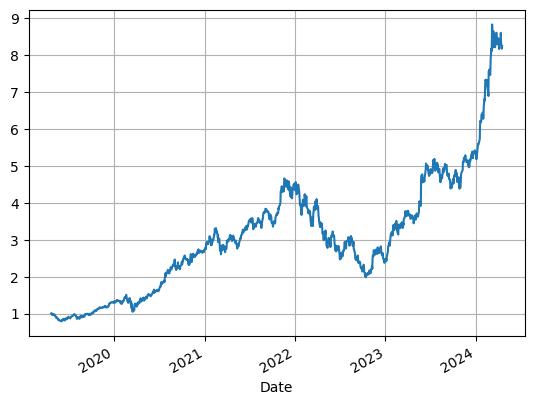

In [52]:
portfolio_performance = (1 +portfolio).cumprod()
portfolio_performance.plot()
plt.grid(True)

In [53]:
best_weight

,Return,Weights
41,8235.216876,"(0.05, 0.47, 0.48)"


In [54]:
MC_fiveyear = MCSimulation(
    portfolio_data = price_data,
    weights = best_weight["Weights"].iloc[0],
    num_simulation = 252,
    num_trading_days = 252*1
)

In [55]:
mc_returns = MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

In [56]:
mc_returns

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016472,0.999934,1.045218,0.973009,1.025390,1.003203,0.987781,0.970830,1.007835,1.034472,...,1.024042,1.037863,1.009525,1.003571,0.992746,0.971496,1.016312,0.998683,0.987304,1.016895
2,1.050634,0.974410,1.027198,0.972171,1.048650,0.984178,0.997565,0.989931,0.982465,1.038291,...,1.027906,1.008111,1.034726,1.049788,0.998131,0.990158,1.028615,1.001866,0.971774,1.015051
3,1.075505,0.994882,1.012577,0.961769,1.039510,0.982302,0.982245,1.022260,0.966804,1.046989,...,1.053347,1.020619,1.034667,1.047180,0.984471,0.990717,1.032551,1.038537,0.979374,0.970423
4,1.071660,1.032649,1.019666,0.970248,1.037913,0.975053,0.961578,1.049223,0.998334,1.083724,...,1.082977,1.027296,1.025835,1.046122,0.985819,1.012143,1.072648,1.076548,0.975274,0.976935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.691466,2.019797,1.476336,1.626824,0.938208,1.464255,1.354019,3.176543,1.354310,1.195725,...,0.949303,2.079072,2.104386,2.837587,1.785047,1.193066,2.466654,1.294290,1.668645,2.475231
249,2.670238,2.026127,1.515501,1.610384,0.966978,1.499557,1.345502,3.190288,1.319719,1.190265,...,0.915255,2.049105,2.048518,2.809684,1.804137,1.205252,2.626384,1.294196,1.697572,2.574021
250,2.734426,2.025238,1.501070,1.651279,0.955385,1.475541,1.414480,3.262967,1.351272,1.156777,...,0.899751,2.077212,2.054436,2.768592,1.841202,1.229472,2.585322,1.336370,1.767879,2.518471
251,2.783602,1.975104,1.505146,1.692700,0.973169,1.452583,1.449120,3.261863,1.377591,1.169559,...,0.908853,2.144863,2.085968,2.753498,1.865121,1.240701,2.599031,1.325725,1.774189,2.511452


In [57]:
traces = []

# Iterate over each column in the DataFrame
for column in mc_returns.columns:
    # Create a trace for each column
    trace = go.Scatter(x=mc_returns.index, y=mc_returns[column], mode='lines', name=column)
    traces.append(trace)

# Create the layout
layout = go.Layout(title='Time Series Data',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Value'))

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
pio.show(fig)

In [58]:
tbl = MC_fiveyear.summarize_cumulative_return()

In [59]:
pd.DataFrame({"stats" :tbl}).iloc[1:]

,stats
mean,1.678129
std,0.524734
min,0.737677
25%,1.346975
50%,1.593506
75%,1.920482
max,4.020332
95% CI Lower,0.905564
95% CI Upper,2.921624


In [60]:
def expected_shortfall(returns, alpha=0.05):
    sorted_returns = np.sort(returns)
    n = len(sorted_returns)
    alpha_index = int(np.floor(alpha * n))
    es = np.mean(sorted_returns[:alpha_index])
    return es

In [61]:
round(expected_shortfall(portfolio) * 100,3)

-5.174

In [62]:
volume = pd.concat(vol_data.values(),axis=1)

In [63]:
volume_stats = volume.std()

In [64]:
volume_stats

AMD_vol     2.870535e+07
NVDA_vol    1.854728e+07
TSM_vol     5.588254e+06
dtype: float64

In [69]:
upper_boud =   volume.mean() + volume.std()
lower_boud =    volume.mean() - volume.std()

In [70]:
volume_profile = pd.DataFrame({"upper_boud" : upper_boud, "lower_boud" : lower_boud})

In [71]:
volume_profile.T

,AMD_vol,NVDA_vol,TSM_vol
upper_boud,9.475319e+07,6.417171e+07,1.606149e+07
lower_boud,3.734248e+07,2.707714e+07,4.884982e+06


In [71]:
pd.DataFrame(volume_profile)

,upper_boud,lower_boud
AMD_vol,1.521639e+08,-2.006857e+07
NVDA_vol,1.012663e+08,-1.001770e+07
TSM_vol,2.723770e+07,-6.291429e+06


In [2]:
byop.make_your_portfolio(["AMD", "NVDA"])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpa

Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpa

Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpackages\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\mehas\Desktop\StartUp\quant-alchemy\quant-alchemy\stats_app\scripts\subpa

Running Monte Carlo simulation number 250.


(AMD     0.53
 NVDA    0.52
 dtype: float64,
 [Scatter({
      'mode': 'lines',
      'name': '0',
      'x': array([  0,   1,   2, ..., 250, 251, 252], dtype=int64),
      'y': array([1.        , 0.95326014, 0.95785999, ..., 1.67603369, 1.52985886,
                  1.56488306])
  }),
  Scatter({
      'mode': 'lines',
      'name': '1',
      'x': array([  0,   1,   2, ..., 250, 251, 252], dtype=int64),
      'y': array([1.        , 1.02542853, 0.99516209, ..., 0.8533152 , 0.87056529,
                  0.86268193])
  }),
  Scatter({
      'mode': 'lines',
      'name': '2',
      'x': array([  0,   1,   2, ..., 250, 251, 252], dtype=int64),
      'y': array([1.        , 0.98844374, 1.01783751, ..., 1.04223845, 1.03046443,
                  1.02441799])
  }),
  Scatter({
      'mode': 'lines',
      'name': '3',
      'x': array([  0,   1,   2, ..., 250, 251, 252], dtype=int64),
      'y': array([1.        , 0.96262122, 0.96165077, ..., 1.98172725, 2.04977272,
                  2.0597